# Введение
Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss:



L(y, z) = −y log z − (1 − y) log 1 − z

Здесь через y обозначен истинный ответ, через z — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

# Реализация в sklearn
В пакете scikit-learn градиентный бустинг реализован в модуле ensemble в виде классов GradientBoostingClassifier и GradientBoostingRegressor. Основные параметры, которые будут интересовать нас: n_estimators, learning_rate. Иногда может быть полезен параметр verbose для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод staged_decision_function. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете scikit-learn представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией train_test_split модуля cross_validation. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные X и y, где X — это признаковое описание объектов, y — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:

Обратите внимание, что при фиксированном параметре random_state результат разбиения можно воспроизвести.

Метрика log-loss реализована в пакете metrics: sklearn.metrics.log_loss. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
gbm_data = pd.read_csv('_75fb7a1b6f3431b6217cdbcba2fd30b9_gbm-data.csv')
gbm_target = gbm_data.pop('Activity').to_frame().values
gbm_data = gbm_data.values

In [3]:
gbm_target

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [4]:
gbm_data

array([[0.        , 0.49700901, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.36666667, 0.60629148, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.0333    , 0.48012427, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.52056377, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.7656462 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.53395198, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(gbm_data, gbm_target,  test_size = 0.8, random_state = 241)

2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.0190           11.21s
         2           0.9192           10.29s
         3           0.8272            9.97s
         4           0.7834            9.84s
         5           0.7109            9.75s
         6           0.6368            9.80s
         7           0.5797            9.72s
         8           0.5610            9.71s
         9           0.5185            9.59s
        10           0.4984            9.58s
        20           0.1999           10.40s
        30           0.1313           10.25s
        40           0.0790            9.83s
        50           0.0511            9.09s
        60           0.0352            8.54s
        70           0.0245            7.96s
        80           0.0162            7.42s
        90           0.0114            6.92s
       100           0.0077            6.47s
       200           0.0004            1.98s
Learning_rate: 1
      Iter       Train Loss   Remaini

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         5           0.8381           10.09s
         6           0.7995           10.37s
         7           0.7559           10.66s
         8           0.7205           10.50s
         9           0.6958           10.44s
        10           0.6725           10.68s
        20           0.4672           10.18s
        30           0.3179           10.46s
        40           0.2274           10.16s
        50           0.1774            9.48s
        60           0.1394            8.84s
        70           0.1050            8.40s
        80           0.0805            7.78s
        90           0.0650            7.21s
       100           0.0511            6.64s
       200           0.0058            2.19s
Learning_rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.2095            9.69s
         2           1.1006            9.41s
         3           1.0240            9.21s
         4           0.9729            9.03s
         5           0.9387        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         6           0.8948            9.33s
         7           0.8621            9.27s
         8           0.8360            9.19s
         9           0.8171            9.16s
        10           0.7883            9.07s
        20           0.6029            8.63s
        30           0.4760            8.25s
        40           0.3879            8.30s
        50           0.3325            8.07s
        60           0.2759            7.82s
        70           0.2304            8.01s
        80           0.1969            7.74s
        90           0.1718            7.47s
       100           0.1404            7.07s
       200           0.0358            2.29s
Learning_rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.2613           11.59s
         2           1.1715           11.47s
         3           1.1009           11.49s
         4           1.0529           10.98s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         5           1.0130           11.20s
         6           0.9740           10.96s
         7           0.9475           10.91s
         8           0.9197           10.75s
         9           0.8979           10.67s
        10           0.8730           10.55s
        20           0.7207           10.56s
        30           0.6055           10.94s
        40           0.5244           10.14s
        50           0.4501            9.49s
        60           0.3908            8.93s
        70           0.3372            8.36s
        80           0.3009            7.84s
        90           0.2603            7.41s
       100           0.2327            6.91s
       200           0.0835            2.19s
Learning_rate: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.3199            8.96s
         2           1.2645            9.05s
         3           1.2170            9.06s
         4           1.1775            8.98s
         5           1.1404        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         6           1.1106            9.27s
         7           1.0844            9.27s
         8           1.0617            9.23s
         9           1.0411            9.16s
        10           1.0223            9.10s
        20           0.8864            8.63s
        30           0.7844            8.29s
        40           0.7176            7.97s
        50           0.6590            7.71s
        60           0.6120            7.34s
        70           0.5599            6.99s
        80           0.5242            6.61s
        90           0.4829            6.19s
       100           0.4473            5.77s
       200           0.2379            1.92s
Learning_rate: 0.1


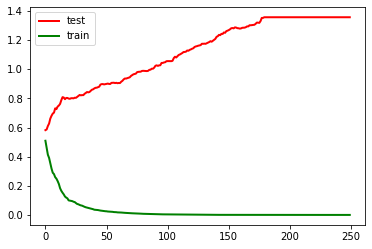

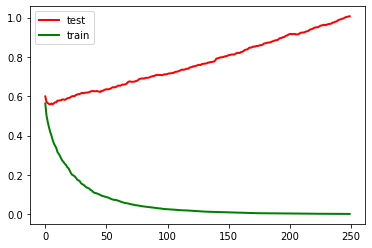

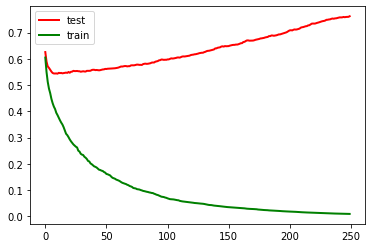

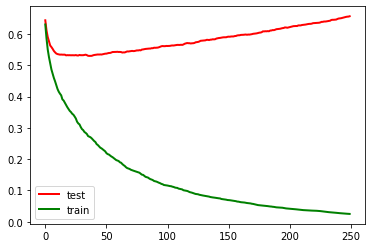

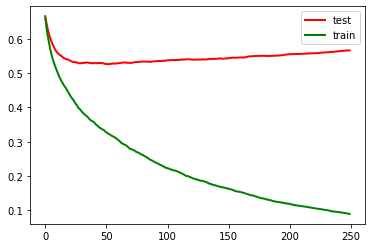

In [6]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    test_loss = []
    train_loss = []

    gbclf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr, verbose=True, random_state=241)
    gbclf.fit(X_train, y_train)
    for i, y_pred in enumerate(gbclf.staged_predict_proba(X_test)):
        #y_pred = 1.0000 / (1.0000 + np.exp(-y_pred))
        test_loss.append(log_loss(y_test, y_pred))
        
    for i, y_pred in enumerate(gbclf.staged_predict_proba(X_train)):
        #y_pred = 1.0000 / (1.0000 + np.exp(-y_pred))
        train_loss.append(log_loss(y_train, y_pred))
    
    print(f'Learning_rate: {lr}')
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

По графику можно видеть, что хотя на обучающей выборке качество возрастает, на тестовой выборке после примерно 50 итерации качество начинает убывать.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.2613           12.95s
         2           1.1715           12.40s
         3           1.1009           11.77s
         4           1.0529           11.44s
         5           1.0130           11.37s
         6           0.9740           11.10s
         7           0.9475           10.97s
         8           0.9197           10.80s
         9           0.8979           10.82s
        10           0.8730           10.80s
        20           0.7207           10.42s
        30           0.6055            9.83s
        40           0.5244            9.15s
        50           0.4501            8.63s
        60           0.3908            8.20s
        70           0.3372            7.81s
        80           0.3009            7.38s
        90           0.2603            6.95s
       100           0.2327            6.51s
       200           0.0835            2.05s
Min log-loss: 0.5301645204906471
Index of min log-loss

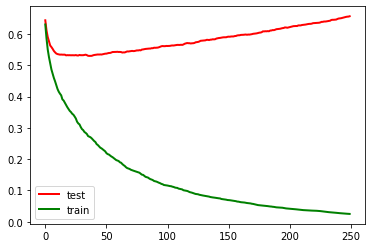

In [7]:
test_loss = []
train_loss = []

gbclf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, verbose=True, random_state=241)
gbclf.fit(X_train, y_train)
for i, y_pred in enumerate(gbclf.staged_predict_proba(X_test)):
    #y_pred = 1.0000 / (1.0000 + np.exp(-y_pred))
    test_loss.append(log_loss(y_test, y_pred))
    
        
for i, y_pred in enumerate(gbclf.staged_predict_proba(X_train)):
    #y_pred = 1.0000 / (1.0000 + np.exp(-y_pred))
    train_loss.append(log_loss(y_train, y_pred))
    
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

print(f'Min log-loss: {min(test_loss)}')
print(f'Index of min log-loss: {test_loss.index(min(test_loss))}')

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfclf = RandomForestClassifier(n_estimators=36, random_state=241)

In [10]:
rfclf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=36,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [11]:
log_loss( y_test, rfclf.predict_proba(X_test))

0.5415685811957381

In [15]:
rfclf_new = RandomForestClassifier(n_estimators=300, random_state=241)
rfclf_new.fit(X_train, y_train)
log_loss( y_test, rfclf_new.predict_proba(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.524537833331343